<a href="https://colab.research.google.com/github/ShinAsakawa/ShinAsakawa.github.io/blob/master/2020chuo/2020Kermack_McKendrick_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 疫学の数理モデルによる導入

- Date: 2020-0320
- Author: 浅川伸一 asakawa@ieee.org

<font color="gray">CoVID-19 の理解に向けて</font>

Kermack と McKendrick は 1905 年から 1906 年にかけてインドで発生したコレラの大流行についての疫学的流行モデルを提案した。

- $y$: population infected 感染者数
- $x$: number of individuals still unaffected 未感染者数
- $z$: number who have been removed by recover and death 地域社会から隔離された人口（理由は問わない，隔離，死去，免疫獲得など）
- $N$: population density 地域社会の総人口 $N=x+y+z$

$\kappa$ を感染率，$\ell$ を隔離係数として Kermack=McKendrick モデルは次式で表される:

$$
\begin{cases}
\frac{dx}{dt} &= - \kappa x y\\
\frac{dy}{dt} &= \kappa x y - \ell y\\
\frac{dz}{dt} &= \ell y
\end{cases}
$$

- Reference:
Kermack and McKendrick (1927) A Contribution to the Mathematical Theory of Epidemics.


In [0]:
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline

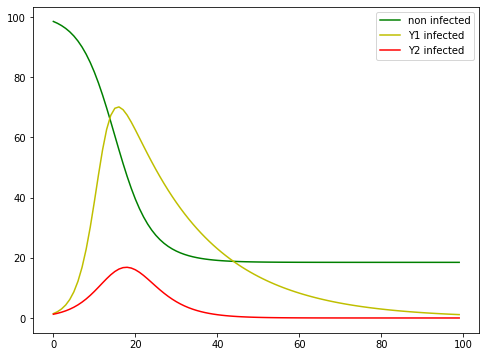

In [0]:
def KM(x0=99, y0=1, length=100, kappa=1.0, ell=1.0, dt=0.005):
    """return Kermack and McKendrick models output"""

    X, Y = [], []
    x, y = x0, y0
    for _ in range(length):
        dx = (-kappa * x * y) * dt
        dy = (kappa * x * y - ell * y) * dt
        x += dx
        y += dy
        X.append(x)
        Y.append(y)

    return X, Y

kappa = 1.0
l1 = 10.
l2 = 50.

_, Y1 = KM(kappa=1.0, ell=l1, length=100)
X, Y2 = KM(kappa=1.0, ell=l2, length=100)
T = range(len(X))

plt.figure(figsize=(8,6))  # width, height inches
plt.plot(T, X, c='g', label='non infected')  # X軸を T, Y軸を X(非感染者) 色(c)を緑(g)で描画
plt.plot(T, Y1, c='y', label='Y1 infected')  # X軸を T, Y軸を Y1(感染者, l=l1) 色(c)を黄色(y)で描画
plt.plot(T, Y2, c='r', label='Y2 infected')  # X軸を T, Y軸を X2(感染者, l=l2) 色(c)を緑(r)で描画
plt.legend()
# plt.savefig('KM_model_output.png') グラフの保存

$\sinh(x) = \frac{\exp(x)-\exp(-x)}{2}$

$\cosh(x) = \frac{\exp(x)+\exp(-x)}{2}$

$\tanh(x) = \frac{\exp(x)-\exp(-x)}{\exp(x)+\exp(-x)}$

$\text{sech}(x) = \frac{1}{\cosh(x)}$

$\text{cosech}(x) = \frac{1}{\sinh(x)}$

$\coth(x) = \frac{\cosh(x)}{\sinh(x)}$


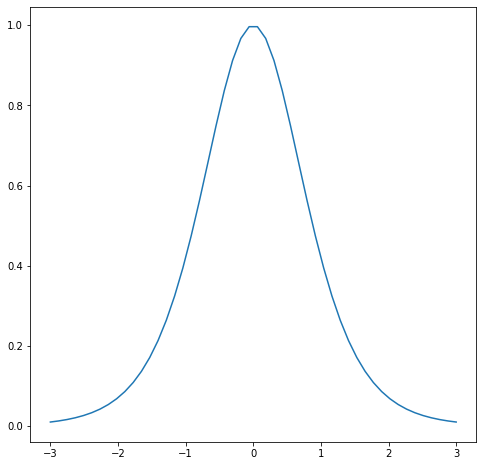

In [0]:
x = np.linspace(-3,3)
plt.figure(figsize=(8,8))
plt.plot(x, 1/np.cosh(x) **2)

In [0]:
from IPython.display import Image
Image(url="https://raw.githubusercontent.com/ShinAsakawa/ShinAsakawa.github.io/master/assets/1927Kermack_McKendrick_fig.png")